# CRNN for Axial Images

In [15]:
import tensorflow as tf
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow import keras

In [40]:
path = "Desktop/Alzheimer-Research-new-branche-copy/ADNI"

In [41]:
os.listdir(path)

['002_S_0782',
 '005_S_0223',
 '007_S_1248',
 '005_S_0222',
 '005_S_0814',
 '002_S_1268',
 '002_S_1261',
 '.DS_Store',
 '007_S_1304',
 '002_S_0295',
 '006_S_0484',
 '005_S_0553',
 '002_S_0619',
 '002_S_0413',
 '005_S_0929',
 '002_S_0816',
 '005_S_0546',
 '021_S_0343',
 '002_S_0954',
 '002_S_0938',
 '002_S_1280',
 '002_S_1070',
 '002_S_0955',
 '007_S_0316',
 '002_S_0559',
 '005_S_0610',
 '014_S_0357',
 '002_S_0729',
 '014_S_0356',
 '005_S_0448',
 '005_S_0221',
 '007_S_1339',
 '002_S_0685',
 '005_S_0324',
 '002_S_1155',
 '006_S_0653',
 '006_S_0547',
 '005_S_0602',
 '002_S_1018',
 '014_S_0328',
 '005_S_1341',
 '014_S_1095']

In [49]:
users = []
for user in os.listdir(path):
    if user != ".DS_Store":
        users.append(user)
print(users)

['002_S_0782', '005_S_0223', '007_S_1248', '005_S_0222', '005_S_0814', '002_S_1268', '002_S_1261', '007_S_1304', '002_S_0295', '006_S_0484', '005_S_0553', '002_S_0619', '002_S_0413', '005_S_0929', '002_S_0816', '005_S_0546', '021_S_0343', '002_S_0954', '002_S_0938', '002_S_1280', '002_S_1070', '002_S_0955', '007_S_0316', '002_S_0559', '005_S_0610', '014_S_0357', '002_S_0729', '014_S_0356', '005_S_0448', '005_S_0221', '007_S_1339', '002_S_0685', '005_S_0324', '002_S_1155', '006_S_0653', '006_S_0547', '005_S_0602', '002_S_1018', '014_S_0328', '005_S_1341', '014_S_1095']


In [43]:
data = tf.keras.utils.image_dataset_from_directory(path,image_size = (128,128),batch_size = 32)

Found 20962 files belonging to 41 classes.


In [44]:
data_iterator = data.as_numpy_iterator()

In [45]:
batch = data_iterator.next()

In [46]:
labels_list = sorted(os.listdir(path))
label_dictionary = {labels_list[i]:i for i in range(len(labels_list))}
label_dictionary

{'.DS_Store': 0,
 '002_S_0295': 1,
 '002_S_0413': 2,
 '002_S_0559': 3,
 '002_S_0619': 4,
 '002_S_0685': 5,
 '002_S_0729': 6,
 '002_S_0782': 7,
 '002_S_0816': 8,
 '002_S_0938': 9,
 '002_S_0954': 10,
 '002_S_0955': 11,
 '002_S_1018': 12,
 '002_S_1070': 13,
 '002_S_1155': 14,
 '002_S_1261': 15,
 '002_S_1268': 16,
 '002_S_1280': 17,
 '005_S_0221': 18,
 '005_S_0222': 19,
 '005_S_0223': 20,
 '005_S_0324': 21,
 '005_S_0448': 22,
 '005_S_0546': 23,
 '005_S_0553': 24,
 '005_S_0602': 25,
 '005_S_0610': 26,
 '005_S_0814': 27,
 '005_S_0929': 28,
 '005_S_1341': 29,
 '006_S_0484': 30,
 '006_S_0547': 31,
 '006_S_0653': 32,
 '007_S_0316': 33,
 '007_S_1248': 34,
 '007_S_1304': 35,
 '007_S_1339': 36,
 '014_S_0328': 37,
 '014_S_0356': 38,
 '014_S_0357': 39,
 '014_S_1095': 40,
 '021_S_0343': 41}

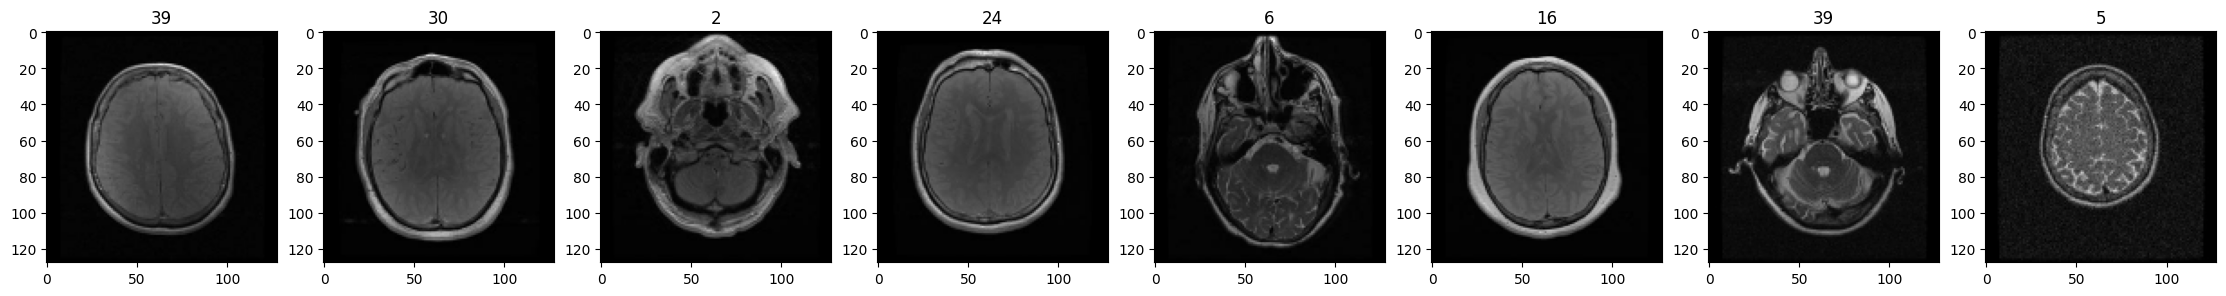

In [47]:
	
fig,ax = plt.subplots(ncols = 8, figsize = (28,28))
rows = 0
for idx,img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])